In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.api import qqplot
from statsmodels.formula.api import ols #for linear regression
import seaborn as sns #for heatmap
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 

In [2]:
data=pd.read_excel("Education.xlsx")

In [3]:
data.head()

,num,sup.help,sup.under,sup.safe,sup.conc,adv.comp,adv.acces,adv.comm,adv.qual,tut.prof,...,sat.glad,sat.expe,sat.over,loy.proud,loy.recom,loy.asha,loy.back,gender,scholarships,job
0,1,7,1,7,4,5,5,6,6,5,...,7,7,7,7,7,1,7,female,yes_scholship,no_job
1,2,7,1,6,4,6,6,5,6,6,...,7,7,7,7,7,1,7,female,yes_scholship,yes_job
2,3,6,1,6,6,6,6,6,6,6,...,7,6,6,7,7,1,7,female,yes_scholship,no_job
3,4,1,7,3,1,1,2,1,1,3,...,1,1,1,1,1,7,1,male,no_scholship,no_job
4,5,6,5,5,7,7,6,7,7,7,...,7,7,7,7,7,1,7,female,yes_scholship,yes_job


In [4]:
# we do not have any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
num             181 non-null int64
sup.help        181 non-null int64
sup.under       181 non-null int64
sup.safe        181 non-null int64
sup.conc        181 non-null int64
adv.comp        181 non-null int64
adv.acces       181 non-null int64
adv.comm        181 non-null int64
adv.qual        181 non-null int64
tut.prof        181 non-null int64
tut.sched       181 non-null int64
tut.stud        181 non-null int64
tut.qual        181 non-null int64
val.devel       181 non-null int64
val.deci        181 non-null int64
val.meet        181 non-null int64
val.info        181 non-null int64
sat.glad        181 non-null int64
sat.expe        181 non-null int64
sat.over        181 non-null int64
loy.proud       181 non-null int64
loy.recom       181 non-null int64
loy.asha        181 non-null int64
loy.back        181 non-null int64
gender          181 non-null object
scholarships    181

In [5]:
data_num = data.select_dtypes(exclude="object")
data_obj = data.select_dtypes(include="object")

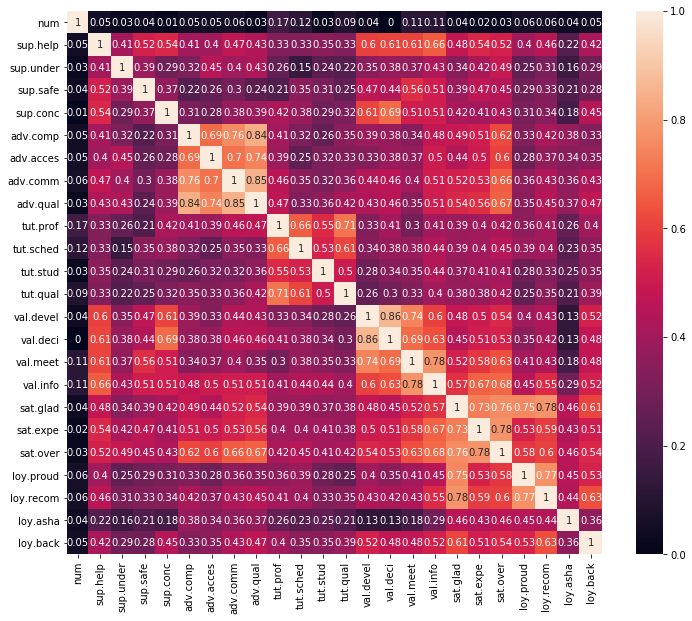

In [6]:
plt.figure(figsize=(12, 10)) 
sns.heatmap(data_num.corr().abs().round(2), annot=True)
plt.show()

In [7]:
# there are no variables with 0 variance
data_num.var()==0

num          False
sup.help     False
sup.under    False
sup.safe     False
sup.conc     False
adv.comp     False
adv.acces    False
adv.comm     False
adv.qual     False
tut.prof     False
tut.sched    False
tut.stud     False
tut.qual     False
val.devel    False
val.deci     False
val.meet     False
val.info     False
sat.glad     False
sat.expe     False
sat.over     False
loy.proud    False
loy.recom    False
loy.asha     False
loy.back     False
dtype: bool

In [8]:
# we do not have any variable with 1 or 0 unique value
for i in data_obj.columns:
    print(data_obj[i].unique())

['female' 'male']
['yes_scholship' 'no_scholship']
['no_job' 'yes_job']


In [9]:
data_dummy = pd.get_dummies(data_obj,prefix=data_obj.columns,drop_first=True)

In [10]:
data_final = data_num.join(data_dummy)

In [11]:
Y=data_final[["sat.glad", "sat.expe", "sat.over"]]
X=scale(data_final.drop(columns=["sat.glad", "sat.expe", "sat.over"]))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [13]:
#when running the PLS, we define the number of Latent variables.
pls = PLSRegression(24)
pls = pls.fit(x_train,y_train)

In [14]:
#we will predict the model on the test set using the model
pred=pls.predict(x_test)

In [15]:
#R-square
pls_r2=pls.score(x_test,y_test)
print(pls_r2)

0.3799993212319044


In [16]:
#coefficients per all 24 X variables
coef=pd.DataFrame(pls.coef_)
coef.head()

,0,1,2
0,-0.092201,-0.010778,0.011695
1,-0.082083,-0.022470,-0.076199
2,-0.017806,-0.108201,-0.044764
3,0.044780,0.096085,0.034817
4,0.086909,0.083247,0.010079


In [17]:
#scores of Latent variables
scores=pd.DataFrame(pls.x_scores_)
scores.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.857638,0.133764,0.853618,-0.100318,-1.185610,0.248376,0.063070,-1.108548,-0.755446,-0.356219,...,-0.517430,-0.369392,-0.552929,0.434869,0.184565,-0.293866,0.375193,0.097923,0.097535,-0.499810
1,2.415631,0.042520,-0.115469,-1.361089,-0.093698,0.744205,-1.260321,-0.347833,-0.637110,-0.469920,...,0.337248,0.639794,0.622637,-0.225900,0.401094,0.192055,0.071871,-0.041822,0.361475,-0.076013
2,2.945618,-0.957652,0.682871,-0.474348,1.006220,-0.716889,-0.076299,0.151221,0.293680,0.349724,...,-0.365023,-0.159816,-0.085023,0.545702,-0.558818,0.008628,0.044607,-0.350516,-0.292360,-0.052759
3,-7.859322,-1.977142,-0.105344,0.851490,-0.547091,0.052130,-0.211254,0.090682,-0.282570,0.690123,...,0.955525,-0.208785,0.136365,-0.069277,-0.124130,-0.150283,-0.241268,-0.252921,-0.115290,-0.169349
4,-1.926817,1.610129,0.058334,-1.839356,-0.827321,-1.215046,1.002554,1.222161,-0.252264,-0.754077,...,-0.159072,0.333567,0.105840,0.761977,1.131836,-0.099718,0.161990,-0.410147,-0.046132,0.679442


# Now we will calculate how much of the variance of all X variables is explained by each Latent variable.

For that reason:

(1) We will calculate the variance for each Latent variable

(2) We will calculate total variance of all X variables

(3) We will calculate the proportion of total X variance explained by each Latent variable

(4) Then we'll canculate the cumulative variance 

In [18]:
var_xcores=np.var(pls.x_scores_,axis=0)
print(var_xcores)

[9.2525381  1.23121137 1.34089609 1.08137006 0.79987243 0.85824961
 0.68189272 0.5069814  0.55528937 0.55930164 0.43866701 0.43160934
 0.26798586 0.32060981 0.40920885 0.34144167 0.336986   0.17244706
 0.35822698 0.16683577 0.27406973 0.19233022 0.28676052 0.26297047]


In [19]:
total_var=np.sum(np.var(x_train,axis=0))
print(total_var)

25.07465087249158


In [20]:
X_Variance=pd.DataFrame((var_xcores/total_var).round(3), columns={"X_Variance"}).reset_index()

In [21]:
X_Variance.head()

,index,X_Variance
0,0,0.369
1,1,0.049
2,2,0.053
3,3,0.043
4,4,0.032


In [22]:
X_Variance = X_Variance.rename(columns={'index': 'Latent_Factors'})
X_Variance['Cummulative_X_Variance'] = X_Variance['X_Variance'].cumsum().round(3) #calculates cummulative variance
print(X_Variance)

    Latent_Factors  X_Variance  Cummulative_X_Variance
0                0       0.369                   0.369
1                1       0.049                   0.418
2                2       0.053                   0.471
3                3       0.043                   0.514
4                4       0.032                   0.546
5                5       0.034                   0.580
6                6       0.027                   0.607
7                7       0.020                   0.627
8                8       0.022                   0.649
9                9       0.022                   0.671
10              10       0.017                   0.688
11              11       0.017                   0.705
12              12       0.011                   0.716
13              13       0.013                   0.729
14              14       0.016                   0.745
15              15       0.014                   0.759
16              16       0.013                   0.772
17        

As we can see from the table the first latent factor explains the highes proportion of the variance of X (36.9%), while the second factor explains only 4.9% of the variance of X and so on. Together, the first 20 factors explain 80.0% of the variance in the predictors.

Variance of all X variables is explained by all Latent Factors by 84% but not 100%, since PLS model finds the Latents that explain X and are also best to explain Y. In other words, PLS maximizes the covariance between predictors (X) and targets (Y).

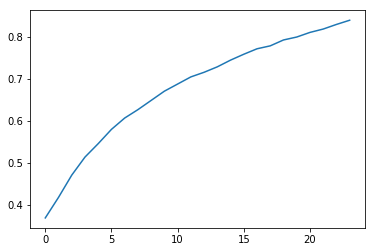

In [23]:
#from the graph we can see from which Latent variable the variance changes slightly
plt.plot(X_Variance.Latent_Factors,X_Variance.Cummulative_X_Variance)
plt.show()